In [1]:
# Heart Disease Prediction using Random Forest Algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#Variable identification
#Dependent Variable - Target
#Inependent Variable - [age,sex,cp,trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

In [7]:
to_rename = {'age' : 'Age','sex' : 'Sex','cp' : 'Chest Pain','trestbps' : 'BPS','chol' : 'Cholesterol',
             'fbs' : 'FBS','restecg' : 'RestECG','thalach' : 'Thalach','exang' : 'EIA','oldpeak' : 'Oldpeak',
             'slope' : 'Slope','ca' : 'CA','thal' : 'Thal','target' : 'Target'}
df.rename(columns = to_rename, inplace = True)

In [8]:
df

,Age,Sex,Chest Pain,BPS,Cholesterol,FBS,RestECG,Thalach,EIA,Oldpeak,Slope,CA,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
#EXPLORATORY DATA ANALYSIS

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          303 non-null    int64  
 1   Sex          303 non-null    int64  
 2   Chest Pain   303 non-null    int64  
 3   BPS          303 non-null    int64  
 4   Cholesterol  303 non-null    int64  
 5   FBS          303 non-null    int64  
 6   RestECG      303 non-null    int64  
 7   Thalach      303 non-null    int64  
 8   EIA          303 non-null    int64  
 9   Oldpeak      303 non-null    float64
 10  Slope        303 non-null    int64  
 11  CA           303 non-null    int64  
 12  Thal         303 non-null    int64  
 13  Target       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#Univariate Analysis

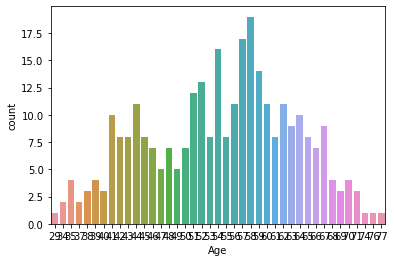

In [12]:
sns.countplot(x='Age', data=df)

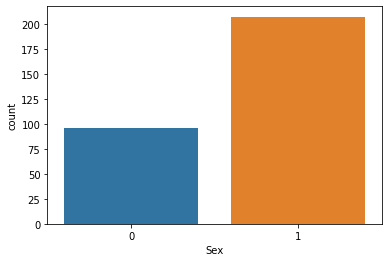

In [13]:
sns.countplot(x='Sex', data=df)

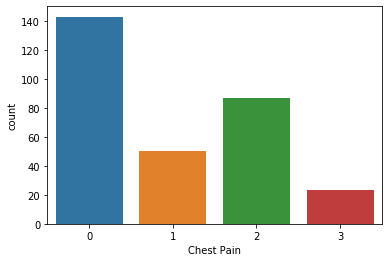

In [14]:
sns.countplot(x='Chest Pain', data=df)

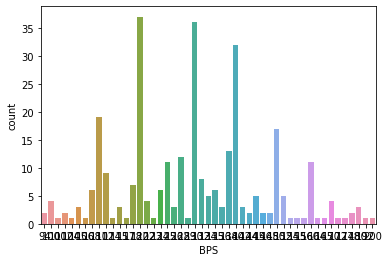

In [15]:
sns.countplot(x='BPS', data=df)

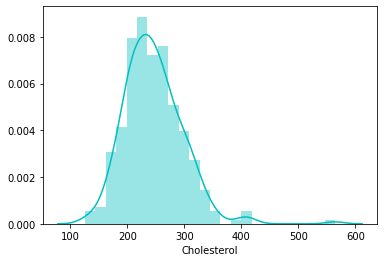

In [16]:
sns.distplot(df["Cholesterol"], color='c')

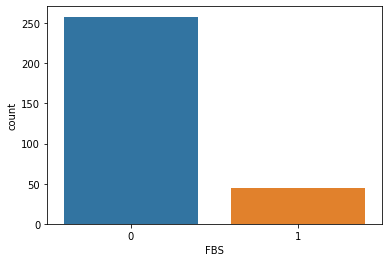

In [17]:
sns.countplot(df['FBS'])

In [18]:
#Bivariate Analysis

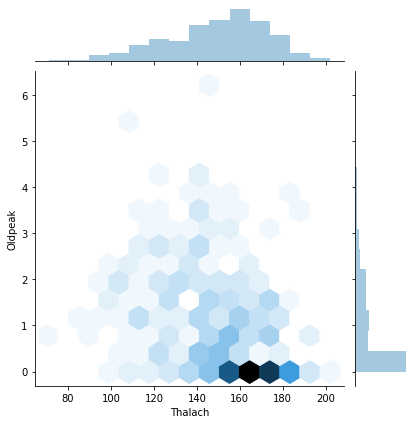

In [19]:
sns.jointplot(x = 'Thalach', y = 'Oldpeak', data= df, kind ='hex')

In [20]:
df1 = df[['Sex','BPS','Cholesterol','Thalach', 'Oldpeak']]
df1

,Sex,BPS,Cholesterol,Thalach,Oldpeak
0,1,145,233,150,2.3
1,1,130,250,187,3.5
2,0,130,204,172,1.4
3,1,120,236,178,0.8
4,0,120,354,163,0.6
...,...,...,...,...,...
298,0,140,241,123,0.2
299,1,110,264,132,1.2
300,1,144,193,141,3.4
301,1,130,131,115,1.2


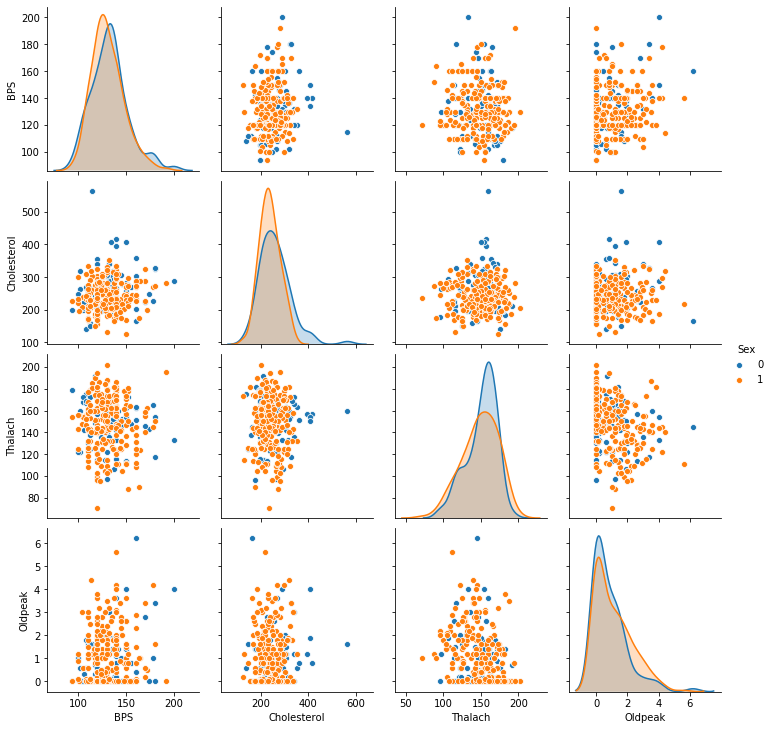

In [21]:
g = sns.pairplot(df1, hue='Sex')

In [22]:
#Model fitting

In [23]:
df.describe()

,Age,Sex,Chest Pain,BPS,Cholesterol,FBS,RestECG,Thalach,EIA,Oldpeak,Slope,CA,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split #importing split function

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [27]:
#Random Forest Algorithm modelling

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, n_jobs = 2, random_state = 0)
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
#Applying the trained data to predict the test data

In [31]:
y_pred = RFC.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [32]:
#Accuracy Matrix

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [34]:
CM = confusion_matrix(y_test, y_pred)
CM

array([[33,  8],
       [ 6, 44]], dtype=int64)

In [35]:
metrics.accuracy_score(y_test,y_pred)

0.8461538461538461

In [36]:
print("Accuracy :", round(metrics.accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy : 84.62 %


In [37]:
pd.crosstab(y_test, y_pred, rownames = ["Actual Status"], colnames = ["Predicted Status"])

Predicted Status,0,1
Actual Status,,
0,33,8
1,6,44
